HW 2

Этот набор данных содержит информацию о подержанных автомобилях.

- Car_Name - Название автомобиля
- Year - год в котором купил машину предыдущий владелец
- Selling_Price - цена продажи машины сейчас
- Present_Price - предыдущая цена покупки
- Kms_Driven - сколько километров проехала машина
- Fuel_Type - тип используемого топлива
- Seller_Type - тип продавца
- Transmission - тип коробки передач
- Owner - количество владельцев автомобиля до текущего хозяина

Целевой переменной считать - Selling_Price.

1. После загрузки необходимо проанализировать существующие признаки.
2. Определите какие признаки являются числовыми, а какие категориальными (кодом!) Выведите список одних и других.
3. Используйте стратегию валидации Holdout. Постройте линейную регрессию на числовых признаках. Оцените качество работы с помощью метрик MSE и MAE.
4. Проанализируйте важность признаков без библиотеки yellowbrick.
5. Сравните результат вашего анализа с результатов yellowbrick.
6. Добавьте категориальные признаки при помощи метода sklearn.preprocessing.OneHotEncoder. [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) + [Пример использования](https://www.dmitrymakarov.ru/data-analysis/encoding-10/#10-klass-onehotencoder)
7. Переобучите модель. Также проанализируйте важность признаков, что изменилось? А как изменились метрики?
8. Добавьте регуляризацию (3 типа). Как меняется важность признаков? Как изменяются метрики?
9. Добавьте [Learning Curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) для одной из моделей. [Визуализируйте результат!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [218]:
# Импорты

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances

from sklearn.preprocessing import OneHotEncoder


In [219]:
# Загрузка данных
sharing_url = "https://drive.google.com/file/d/1qeae-8oAfQnULTs838ROpupXLvMNwtiO/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)

In [220]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [221]:
#1. После загрузки необходимо проанализировать существующие признаки.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [222]:
#2.1. Определите какие признаки являются числовыми. Выведите список.

numbers = list(df.select_dtypes(['int', 'float']).columns)
list(numbers)

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [223]:
#2.2. Определите какие признаки являются категориальными. Выведите список.

categories = list(df.select_dtypes(['object']).columns)
list(categories)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [224]:
y = df['Selling_Price']

In [225]:
X = df[numbers].drop(['Selling_Price'], axis=1)

In [226]:
#3.1. Используйте стратегию валидации Holdout.

sc = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=42)

pandas_columns = X_train.columns
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

X_train = pd.DataFrame(X_train, columns=pandas_columns)
X_test = pd.DataFrame(X_test, columns=pandas_columns)
X_val = pd.DataFrame(X_val, columns=pandas_columns)

In [227]:
#3.2. Постройте линейную регрессию на числовых признаках. 

reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [228]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
val_preds = model.predict(X_val)

In [229]:
#3.3. Оцените качество работы с помощью метрик MSE и MAE.
#Измерим ошибку на всех выборках и сравним с ошибкой на тестовой. Если не сильно отличается, значит модель не переобучилась

MSE_train_0 = mean_squared_error(y_train, train_preds)
MSE_valid_0 = mean_squared_error(y_val, val_preds)
MSE_test_0 = mean_squared_error(y_test, test_preds)

print('MSE_test_0: ', MSE_test_0, '\nMSE_train_0: ',MSE_train_0, '\nMSE_valid_0: ', MSE_valid_0)

MSE_test_0:  8.409789021225903 
MSE_train_0:  1.3596024868428653 
MSE_valid_0:  5.690787753999224


In [230]:
MAE_train_0 = mean_absolute_error(y_train, train_preds)
MAE_valid_0 = mean_absolute_error(y_val, val_preds)
MAE_test_0 = mean_absolute_error(y_test, test_preds)

print('MAE_test_0: ', MAE_test_0, '\nMAE_train_0: ',MAE_train_0, '\nMAE_valid_0: ', MAE_valid_0)

MAE_test_0:  1.4172617855659382 
MAE_train_0:  0.831787199401353 
MAE_valid_0:  1.4487846544397585


4. Проанализируйте важность признаков без библиотеки yellowbrick.

Если посмотреть на данные, в целом кажется, что самым важным признаком будет Present_Price и возможно Year, поскольку можно проследить некоторую связь между значениями

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


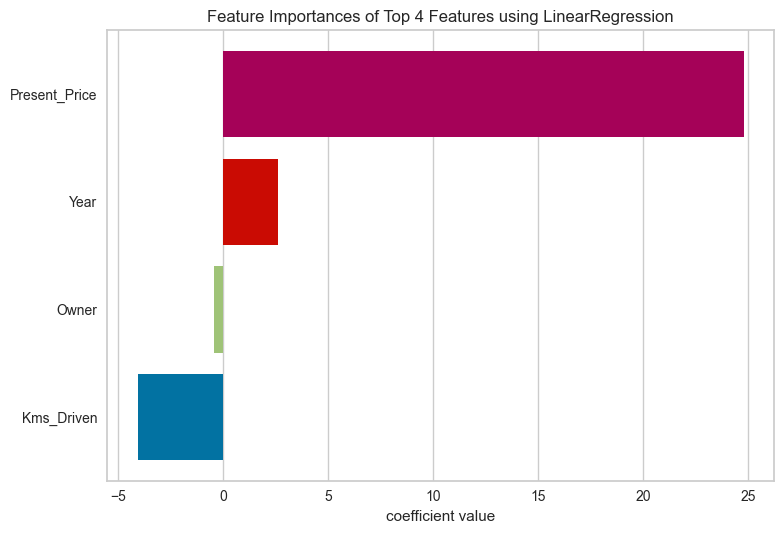

<Axes: title={'center': 'Feature Importances of Top 4 Features using LinearRegression'}, xlabel='coefficient value'>

In [231]:
#5. Сравните результат вашего анализа с результатов yellowbrick.

viz0 = FeatureImportances(model, topn=4, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

Итак, по графику видно, что наибольшую важность действительно имеет Present_Price. Year является гораздо менее важным признаком, но все же оказывает достаточное влияние. 

In [232]:
#6. Добавьте категориальные признаки при помощи OneHotEncoder.

enc = OneHotEncoder(sparse_output=False)

one_hot_encoded = enc.fit_transform(df[categories])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=enc.get_feature_names_out(categories))

df_encoded = pd.concat([df.drop(categories, axis=1), one_hot_df], axis=1)

In [233]:
#7.1. Переобучите модель.

X = df_encoded.drop(['Selling_Price'], axis = 1)
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=42)

pandas_columns = X_train.columns
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.42, random_state=42)

X_train = pd.DataFrame(X_train, columns=pandas_columns)
X_test = pd.DataFrame(X_test, columns=pandas_columns)
X_val = pd.DataFrame(X_val, columns=pandas_columns)

In [234]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [235]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
val_preds = model.predict(X_val)

In [236]:
MSE_train = mean_squared_error(y_train, train_preds)
MSE_valid = mean_squared_error(y_val, val_preds)
MSE_test = mean_squared_error(y_test, test_preds)

print('MSE_test_0: ', MSE_test_0, '/ ','MSE_test: ', MSE_test, '\nMSE_train_0: ', MSE_test_0, '/ ',' MSE_train: ',MSE_train, '\nMSE_valid_0: ', MSE_valid_0, '/ ',' MSE_valid: ', MSE_valid)

MSE_test_0:  8.409789021225903 /  MSE_test:  1.670363482026423e+25 
MSE_train_0:  8.409789021225903 /   MSE_train:  0.22868596767490196 
MSE_valid_0:  5.690787753999224 /   MSE_valid:  2.3349740410270168e+25


In [237]:
MAE_train = mean_absolute_error(y_train, train_preds)
MAE_valid = mean_absolute_error(y_val, val_preds)
MAE_test = mean_absolute_error(y_test, test_preds)

print('MAE_test_0: ', MAE_test_0, '/ ','MAE_test: ', MAE_test, '\nMAE_train_0: ', MAE_test_0, '/ ',' MAE_train: ',MAE_train, '\nMAE_valid_0: ', MAE_valid_0, '/ ',' MAE_valid: ', MAE_valid)

MAE_test_0:  1.4172617855659382 /  MAE_test:  1321901037477.7793 
MAE_train_0:  1.4172617855659382 /   MAE_train:  0.2619455111228814 
MAE_valid_0:  1.4487846544397585 /   MAE_valid:  1438559472968.514


Метрика МАЕ пострадала...очень сильно и как будто так быть не должно...

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


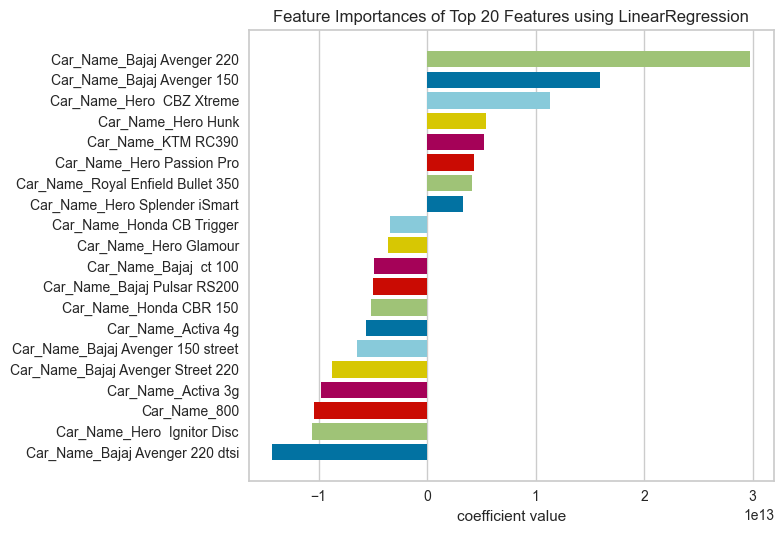

<Axes: title={'center': 'Feature Importances of Top 20 Features using LinearRegression'}, xlabel='coefficient value'>

In [238]:
#7.2. Посмотрим на важность признаков при помощи yellowbrick 

viz0 = FeatureImportances(model, topn=20, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

Теперь самыми важными признаками стали категориальные, названия машин, что в целом логично - в зависимости от бренда меняется ценник машины.

Теперь сделаем с регуляризацией

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


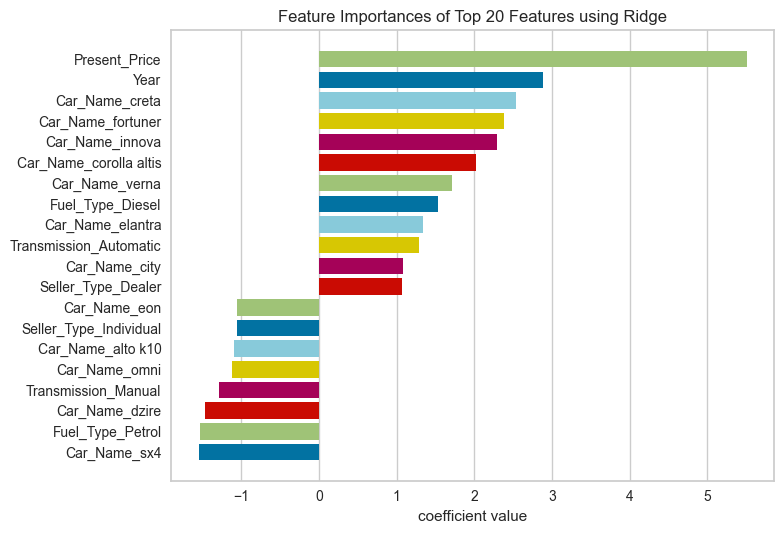

<Axes: title={'center': 'Feature Importances of Top 20 Features using Ridge'}, xlabel='coefficient value'>

In [239]:
model = linear_model.Ridge()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
val_preds = model.predict(X_val)

viz0 = FeatureImportances(model, topn=20, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

Стало поадекватнее, теперь самым важным признаком стал Present_Price, сохранилась важность Year, но добавились и категориальные признаки

In [240]:
MSE_train = mean_squared_error(y_train, train_preds)
MSE_valid = mean_squared_error(y_val, val_preds)
MSE_test = mean_squared_error(y_test, test_preds)

print('MSE_test_0: ', MSE_test_0, '/ ','MSE_test: ', MSE_test, '\nMSE_train_0: ', MSE_test_0, '/ ',' MSE_train: ',MSE_train, '\nMSE_valid_0: ', MSE_valid_0, '/ ',' MSE_valid: ', MSE_valid)

MAE_train = mean_absolute_error(y_train, train_preds)
MAE_valid = mean_absolute_error(y_val, val_preds)
MAE_test = mean_absolute_error(y_test, test_preds)

print('\nMAE_test_0: ', MAE_test_0, '/ ','MAE_test: ', MAE_test, '\nMAE_train_0: ', MAE_test_0, '/ ',' MAE_train: ',MAE_train, '\nMAE_valid_0: ', MAE_valid_0, '/ ',' MAE_valid: ', MAE_valid)

MSE_test_0:  8.409789021225903 /  MSE_test:  6.104259020047968 
MSE_train_0:  8.409789021225903 /   MSE_train:  1.4904676429045858 
MSE_valid_0:  5.690787753999224 /   MSE_valid:  8.807079708964345

MAE_test_0:  1.4172617855659382 /  MAE_test:  1.6868227738729338 
MAE_train_0:  1.4172617855659382 /   MAE_train:  0.893516639961832 
MAE_valid_0:  1.4487846544397585 /   MAE_valid:  1.706240161094388


Вот теперь метрики улучшились по сравнению с изначальными

Посмотрим на Lasso

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


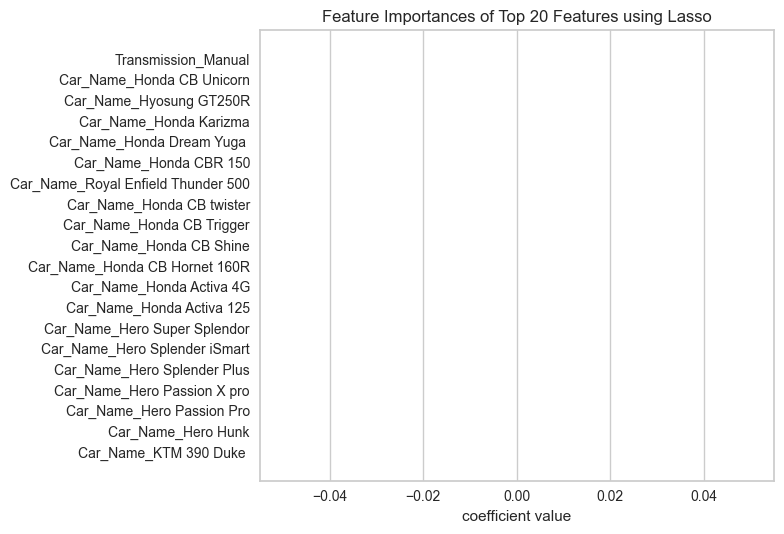

<Axes: title={'center': 'Feature Importances of Top 20 Features using Lasso'}, xlabel='coefficient value'>

In [241]:
model = linear_model.Lasso()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
val_preds = model.predict(X_val)

viz0 = FeatureImportances(model, topn=20, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

Тут совсем странно, нет ни одного "ожидаемо" важного признака

In [242]:
MSE_train = mean_squared_error(y_train, train_preds)
MSE_valid = mean_squared_error(y_val, val_preds)
MSE_test = mean_squared_error(y_test, test_preds)

print('MSE_test_0: ', MSE_test_0, '/ ','MSE_test: ', MSE_test, '\nMSE_train_0: ', MSE_test_0, '/ ',' MSE_train: ',MSE_train, '\nMSE_valid_0: ', MSE_valid_0, '/ ',' MSE_valid: ', MSE_valid)

MAE_train = mean_absolute_error(y_train, train_preds)
MAE_valid = mean_absolute_error(y_val, val_preds)
MAE_test = mean_absolute_error(y_test, test_preds)

print('\nMAE_test_0: ', MAE_test_0, '/ ','MAE_test: ', MAE_test, '\nMAE_train_0: ', MAE_test_0, '/ ',' MAE_train: ',MAE_train, '\nMAE_valid_0: ', MAE_valid_0, '/ ',' MAE_valid: ', MAE_valid)

MSE_test_0:  8.409789021225903 /  MSE_test:  26.485833805338093 
MSE_train_0:  8.409789021225903 /   MSE_train:  16.118163860959495 
MSE_valid_0:  5.690787753999224 /   MSE_valid:  35.59239404207559

MAE_test_0:  1.4172617855659382 /  MAE_test:  3.491624222808961 
MAE_train_0:  1.4172617855659382 /   MAE_train:  3.011065785693767 
MAE_valid_0:  1.4487846544397585 /   MAE_valid:  3.6731020890815924


Метрики тоже ухудшились...

Посмотрим на ElasticNet

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


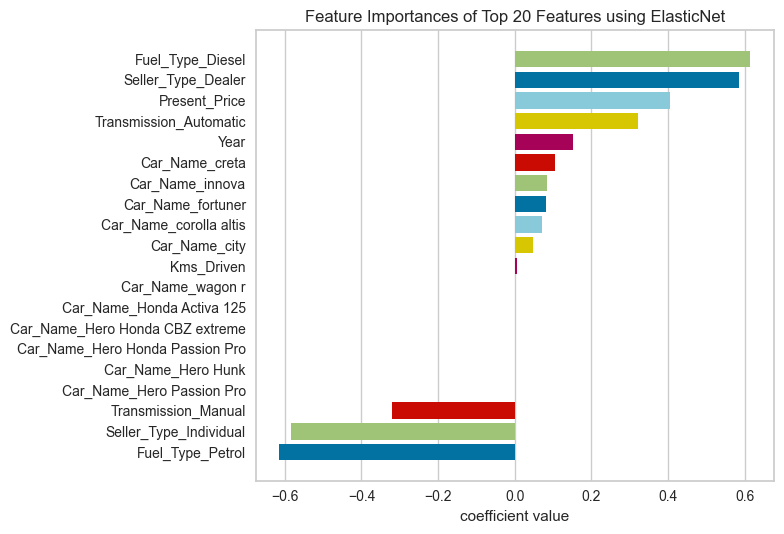

<Axes: title={'center': 'Feature Importances of Top 20 Features using ElasticNet'}, xlabel='coefficient value'>

In [243]:
model = linear_model.ElasticNet(l1_ratio=0.1)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
val_preds = model.predict(X_val)

viz0 = FeatureImportances(model, topn=20, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

In [244]:
MSE_train = mean_squared_error(y_train, train_preds)
MSE_valid = mean_squared_error(y_val, val_preds)
MSE_test = mean_squared_error(y_test, test_preds)

print('MSE_test_0: ', MSE_test_0, '/ ','MSE_test: ', MSE_test, '\nMSE_train_0: ', MSE_test_0, '/ ',' MSE_train: ',MSE_train, '\nMSE_valid_0: ', MSE_valid_0, '/ ',' MSE_valid: ', MSE_valid)

MAE_train = mean_absolute_error(y_train, train_preds)
MAE_valid = mean_absolute_error(y_val, val_preds)
MAE_test = mean_absolute_error(y_test, test_preds)

print('\nMAE_test_0: ', MAE_test_0, '/ ','MAE_test: ', MAE_test, '\nMAE_train_0: ', MAE_test_0, '/ ',' MAE_train: ',MAE_train, '\nMAE_valid_0: ', MAE_valid_0, '/ ',' MAE_valid: ', MAE_valid)

MSE_test_0:  8.409789021225903 /  MSE_test:  19.626520003045233 
MSE_train_0:  8.409789021225903 /   MSE_train:  11.14061083473229 
MSE_valid_0:  5.690787753999224 /   MSE_valid:  26.462482680598146

MAE_test_0:  1.4172617855659382 /  MAE_test:  2.9007226764468643 
MAE_train_0:  1.4172617855659382 /   MAE_train:  2.51344610359475 
MAE_valid_0:  1.4487846544397585 /   MAE_valid:  3.1214601766565853


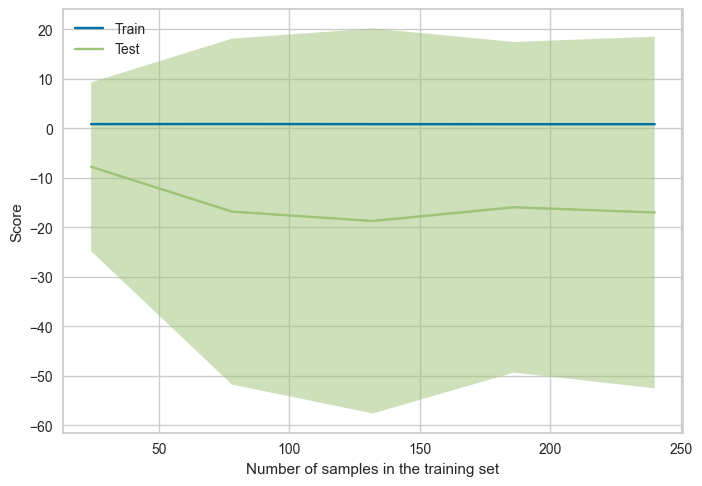

In [245]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(model, X, y)